In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [65]:
#data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/laptops.csv'
#!wget $data
df = pd.read_csv('laptops.csv')
df.head()

,Laptop,Status,Brand,Model,CPU,RAM,Storage,Storage type,GPU,Screen,Touch,Final Price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


### 1. PREPARANDO O DATASET

In [66]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ','_')
df.head()

,laptop,status,brand,model,cpu,ram,storage,storage_type,gpu,screen,touch,final_price
0,ASUS ExpertBook B1 B1502CBA-EJ0436X Intel Core...,New,Asus,ExpertBook,Intel Core i5,8,512,SSD,NaN,15.6,No,1009.00
1,Alurin Go Start Intel Celeron N4020/8GB/256GB ...,New,Alurin,Go,Intel Celeron,8,256,SSD,NaN,15.6,No,299.00
2,ASUS ExpertBook B1 B1502CBA-EJ0424X Intel Core...,New,Asus,ExpertBook,Intel Core i3,8,256,SSD,NaN,15.6,No,789.00
3,MSI Katana GF66 12UC-082XES Intel Core i7-1270...,New,MSI,Katana,Intel Core i7,16,1000,SSD,RTX 3050,15.6,No,1199.00
4,HP 15S-FQ5085NS Intel Core i5-1235U/16GB/512GB...,New,HP,15S,Intel Core i5,16,512,SSD,NaN,15.6,No,669.01


In [67]:
col = ['ram','storage','screen','final_price']

<Axes: xlabel='final_price', ylabel='Count'>

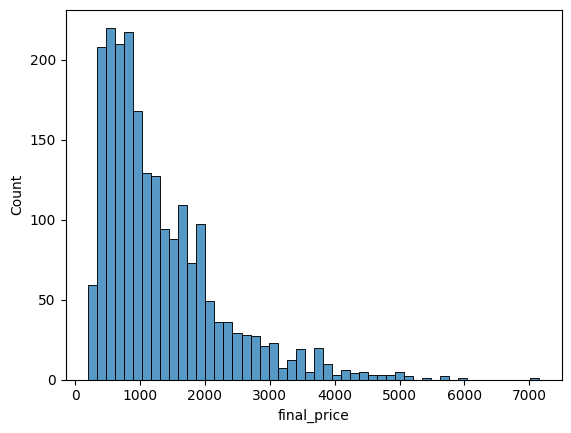

In [68]:
sns.histplot(df['final_price'],bins=50)

In [69]:
df['final_price'] = np.log1p(df['final_price'])

<Axes: xlabel='final_price', ylabel='Count'>

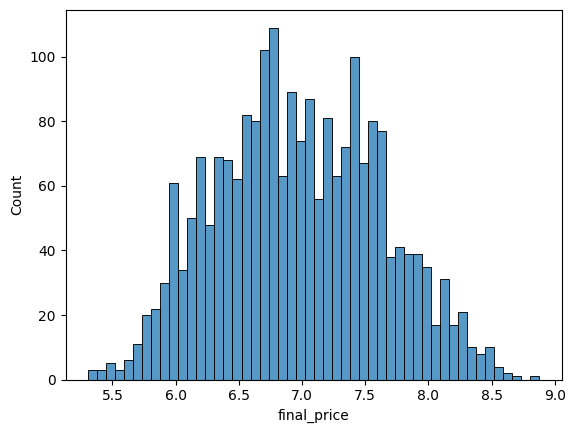

In [70]:
sns.histplot(df['final_price'],bins=50)

In [71]:
# Q1.
df[col].isnull().sum()

#R: screen

ram            0
storage        0
screen         4
final_price    0
dtype: int64

In [72]:
# Q2.
df['ram'].median()

# R: 16

np.float64(16.0)

### 2. SPLIT DATASET

In [73]:
n = len(df)
n_train = int(n * 0.6)
n_val = int(n * 0.2)
n_test = n - n_train - n_val

n, n_train, n_val, n_test

(2160, 1296, 432, 432)

In [74]:
ipx = np.arange(n)
np.random.seed(10)
np.random.shuffle(ipx)
ipx

array([  96,  202,  984, ..., 1344,  527, 1289], shape=(2160,))

In [75]:
df_train = df.iloc[ipx[:n_train]]
df_val = df.iloc[ipx[n_train:n_train + n_val]]
df_test = df.iloc[ipx[n_train + n_val:]]

In [76]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train['final_price']
y_val = df_val['final_price']
y_test = df_test['final_price']

In [77]:
del df_train['final_price']
del df_val['final_price']
del df_test['final_price']

### 3. EDA

In [78]:
col_train = ['ram','storage','screen']
mean = df_train['screen'].mean()

df_train_mean = df_train[col_train].copy()
df_val_mean = df_val[col_train].copy()
df_test_mean = df_test[col_train].copy()

df_train_mean['screen'] = df_train_mean['screen'].fillna(mean).values
df_val_mean['screen'] = df_val_mean['screen'].fillna(mean).values
df_test_mean['screen'] = df_test_mean['screen'].fillna(mean).values

In [79]:
df_train['screen'] = df_train['screen'].fillna(0).values
df_val['screen'] = df_val['screen'].fillna(0).values
df_test['screen'] = df_test['screen'].fillna(0).values

### 4. LINEAR REGRESSION

In [80]:
def train_linear_regression(X,y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones,X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    w0 = w_full[0]
    w = w_full[1:]

    return w0, w

In [81]:
def rmse(y,y_pred):
    error = np.sqrt(((y_pred - y)**2).mean())
    return (f'{(error*100).round(4)} %')

#### 4.1 Com a média

In [96]:
X_train = df_train_mean
w0, w = train_linear_regression(X_train, y_train)

In [97]:
y_pred_train = w0 + X_train.dot(w)

<Axes: xlabel='final_price', ylabel='Count'>

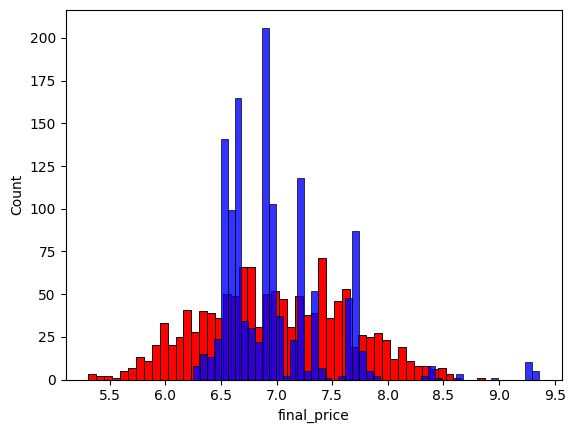

In [98]:
sns.histplot(y_train,bins=50,alpha=1,color='red')
sns.histplot(y_pred_train,bins=50,alpha=0.8,color='blue')

In [99]:
rmse(y_train,y_pred_train)

'43.6432 %'

#### 4.2 Com Zeros

In [100]:
X_train = df_train[col_train]
w0, w = train_linear_regression(X_train, y_train)

In [101]:
y_pred_train = w0 + X_train.dot(w)

<Axes: xlabel='final_price', ylabel='Count'>

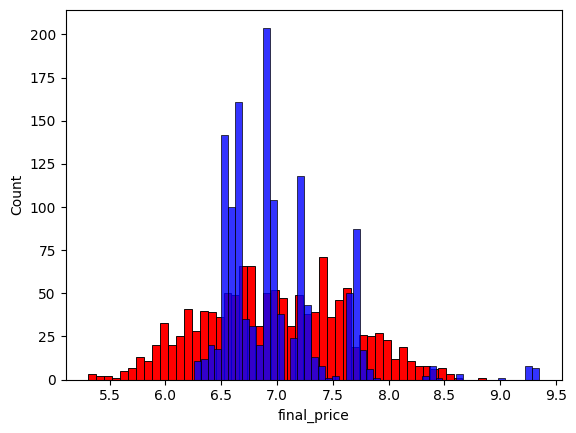

In [102]:
sns.histplot(y_train,bins=50,alpha=1,color='red')
sns.histplot(y_pred_train,bins=50,alpha=0.8,color='blue')

In [103]:
rmse(y_train,y_pred_train)

'43.6101 %'